In [62]:
from data.utils import get_dataset
import captum
import random
import torch
import torchvision
from torchvision import transforms
import numpy as np
from captum.attr import IntegratedGradients
from DebiAN.models.simple_cls import get_simple_classifier

from matplotlib import pyplot as plt
from matplotlib import cm
from PIL import Image

In [63]:
from matplotlib import cm
import numpy as np

def overlay(input, cam, alpha=0.9, colormap="jet"):
    # inspired by https://github.com/frgfm/torch-cam/blob/master/torchcam/utils.py

    img = transforms.ToPILImage()(input)
    # normalize to 0,1
    cam -= torch.min(cam)
    cam /= torch.max(cam)
    cam_img = transforms.ToPILImage(mode='F')(cam)

    if type(colormap) is str:
        cmap = cm.get_cmap(colormap)
    else:
        cmap = colormap

    # Resize mask and apply colormap
    overlay_raw = cam_img.resize(img.size, resample=Image.BILINEAR)
    overlay_raw = cam_img.resize(img.size, resample=Image.NEAREST)
    overlay = overlay_raw
    overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    # Overlay the image with the mask
    overlayed_img = Image.fromarray((alpha * np.asarray(img) + (1 - alpha) * overlay).astype(np.uint8))
    return overlayed_img

In [16]:
model_path="DebiAN/exp/cmnist/debian_bs_256_wd_1E-04_lr_1E-03_cmnist_0.5pct/last.pth"

In [17]:
model=get_simple_classifier('mlp')

In [22]:
# Seed everything
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed_all(1234)

# Get dataset
test_dataset=get_dataset('cmnist',
        data_dir='DebiAN/data/',
        dataset_split="test",
        transform_split="valid",
        percent='1pct')


# load checkpoint


state_dict = torch.load(model_path)
model.load_state_dict(state_dict['model'])
model.cuda()
model = model.eval()


In [72]:
fontsize = 32
viz = True
i=0
idx_img=0
image,label,idx = test_dataset[0]

In [77]:
l1,l2=label

In [80]:
l1.item()

7

In [81]:
l2.item()

9

Text(0.5, 1.0, 'Original image')

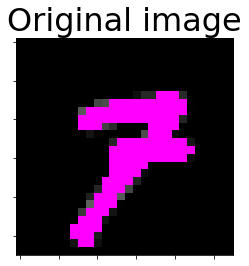

In [74]:
fig, ax = plt.subplots()
ax.imshow(overlay(image, torch.ones(1,28,28), alpha=1.0))
#ax[idx_img][0].axis('off')
ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.set_title("Original image", fontsize=fontsize)


In [ ]:
viz=True
plt.tight_layout()
if viz:
    #print(name, int(dataset[i][1]), imagenet_labels[int(dataset[i][1])])
    plt.show()
else:
    fig.savefig("comparison/"+model_type + "/" + name)
    fig.clear(True)